In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import iplot

In [2]:
#with open('BankChurners.csv', encoding='utf-8') as data:
   # print(data.read())
data = pd.read_csv('BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.shape

(10127, 23)

In [5]:
data.isnull().sum() # пустых значений нет

In [6]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
data.dtypes

In [8]:
data['Education_Level'].unique()

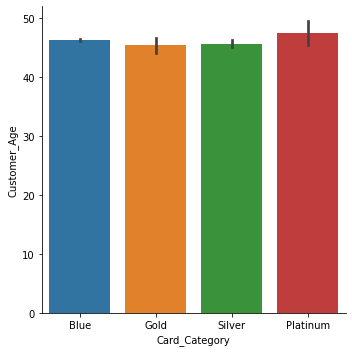

In [9]:
sns.catplot(x='Card_Category',
            y='Customer_Age',
            kind='bar',
            data=data)

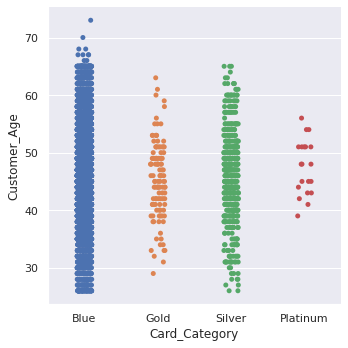

In [10]:
sns.set(style="darkgrid")
sns.catplot(x='Card_Category', #зависимость типа карты от возраста
            y='Customer_Age',
            data=data)

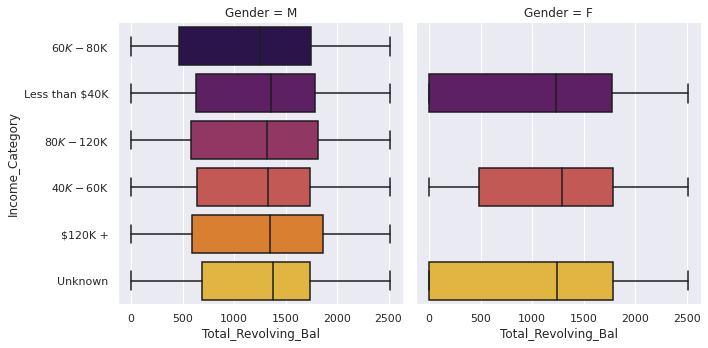

In [12]:
sns.catplot(data=data, #зависимость остатка на карте от дохода (выборка по полу)
            x='Total_Revolving_Bal',
            y='Income_Category',
            col='Gender',
            kind='box',
            palette="inferno")

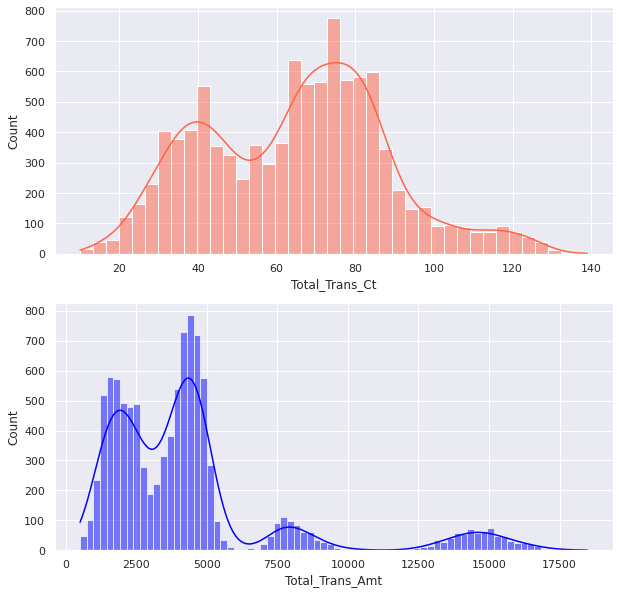

In [13]:
fig, axs = plt.subplots(2,1,figsize=(10,10)) #гистограмма о количестве и общей сумме транзакций
#sns.distplot(data['Total_Trans_Amt'])
#sns.distplot(data['Total_Trans_Ct'])
sns.histplot(data=data,x="Total_Trans_Ct",kde=True,ax=axs[0],color='tomato')
sns.histplot(data=data,x="Total_Trans_Amt",kde=True,ax=axs[1],color='blue')

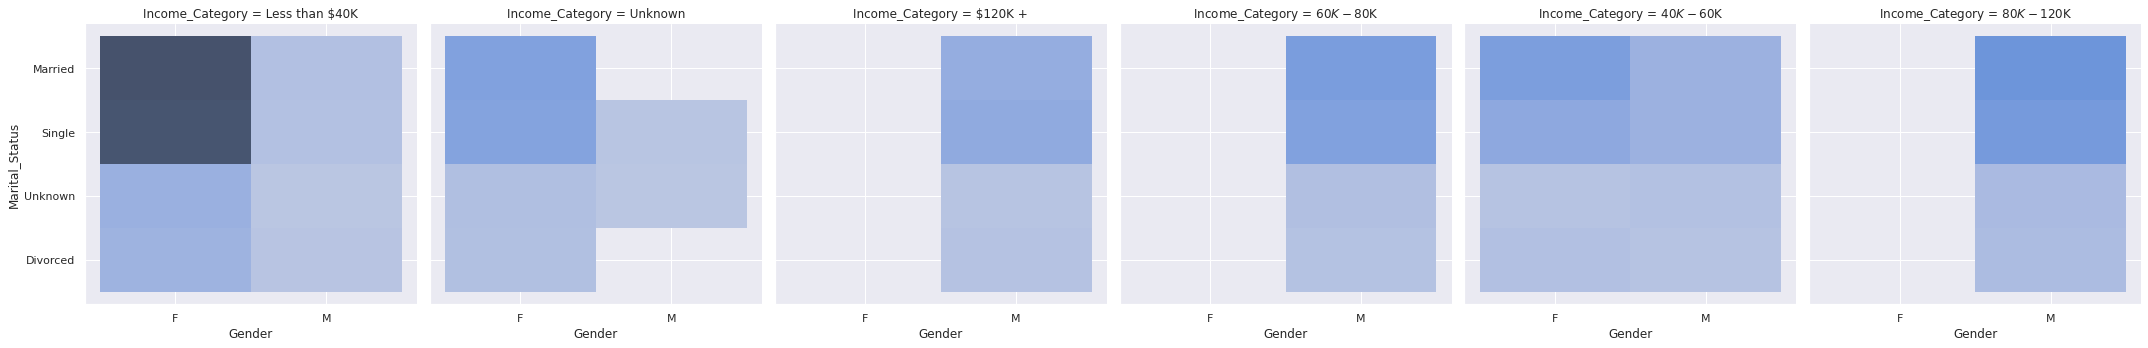

In [14]:
sns_data=data[data['Attrition_Flag']=='Attrited Customer']

#sns.barplot(sns_data['Customer_Age'], y= 'Income_Category' )
sns.displot(sns_data, x='Gender', y= 'Marital_Status', col='Income_Category', palette='Set1')

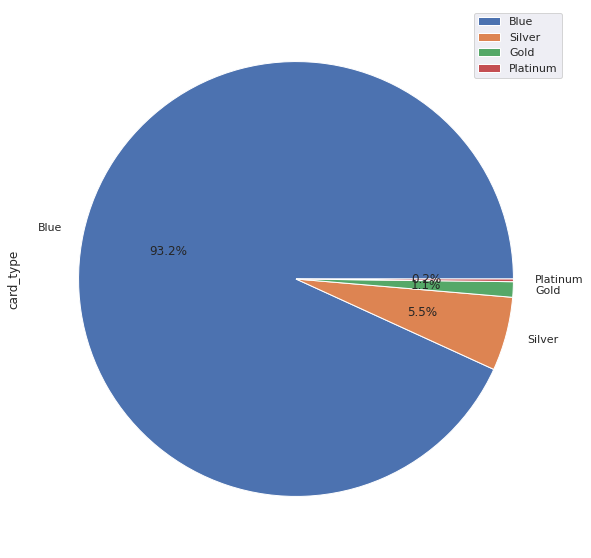

In [15]:
type_counts = data['Card_Category'].value_counts()
df2 = pd.DataFrame({'card_type': type_counts}, index = ['Blue', 'Silver', 'Gold', 'Platinum'])
df2.plot.pie(y='card_type', figsize=(10,10), autopct='%1.1f%%')

In [16]:
data.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267


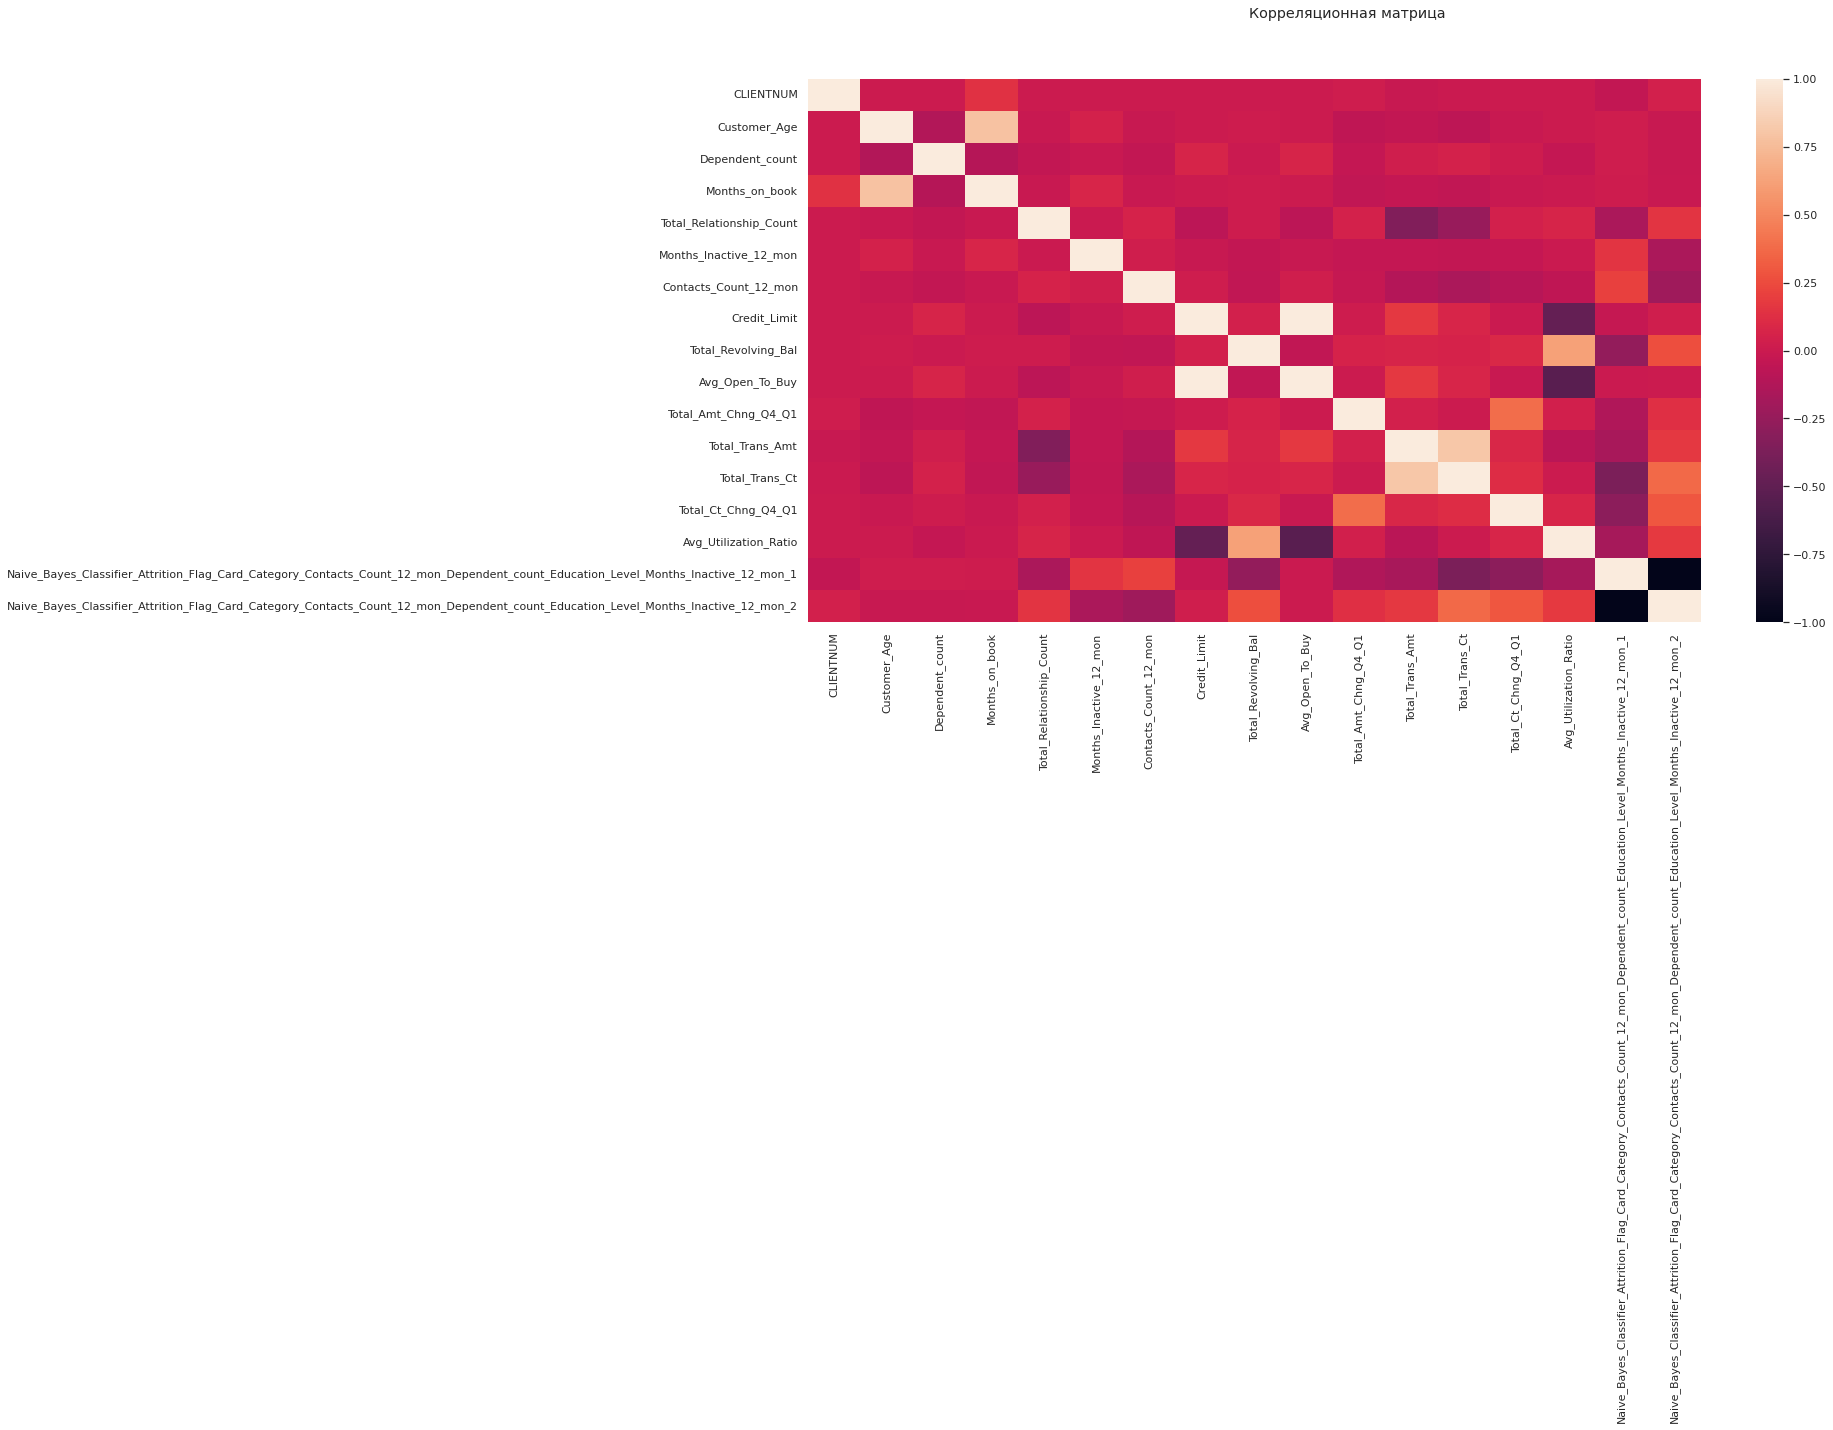

In [20]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax)

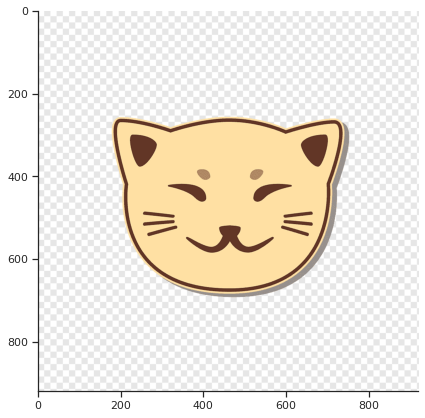

In [18]:
with sns.axes_style("ticks"):
    
    plt.figure(figsize=(7, 7))
    plt.imshow(plt.imread('cat.png'))
    sns.despine()